# Capstone Project - Predicting The Risk Of Customer Churn And Customer Segmentation 

## Data Cleaning and Wrangling 
***

### Author - Oyeronke Ayansola

### Date - 12/12/2022

### <font color=red> Notebook #1</font>

***

## Table of Contents
### [Problem Statement](##Problemstatement)
### [Data Source And Overview](##DataSourceAndOverview)
### [Importing Libraries And Datasets](##ImportingLibrariesAndDatasets)
### [Explore Dataframes](##ExploreAndMergeDataframes)
   ### [1.Customer Data](##1_CustomerData)
   ### [2.Location Data](##2_LocationData)
   ### [3.Order Items Data](##3_OrderItemsData)
   ### [4.Payment Data](##4_PaymentData)
   ### [5.Review Data](##5_ReviewData)
   ### [6.Order Data](##6_OrderData)
   ### [7.ProductData](##7_ProductData)
   ### [8.Seller Data](##8_SellerData)
   ### [9.Product Name Data](##9_ProductNameData)
### [Merge Dataframes](##MergeDataframes)
### [Data Cleaning](##DataCleaning)
### [Conclusion](##Conclusion)


***
## Problem Statement 

**By exploring a given data and using machine learning algorithms we want to predict the customers are likely to churn and segment customers with goal of improving customer services and overall business growth.**

***

## Data Source And Overview 

The data is a Brazilian ecommerce public dataset of orders made at **Olist Store.** The dataset contain orders information from late 2016 to 2018 with an average of 100,000 orders made at multiple marketplaces in Brazil.

Because the data is a real commercial data, it was anonymised, and references to the companies and partners in the review text were replaced with the names of Game of Thrones great houses.

The whole data is made up of nine different dataframes:
* Customer dataframe - This dataset contains customers' information and location
* Order dataframe - The order dataset has information on all orders made by customers 
* Order Item dataframe - It contains information about items purchased 
* Location dataframe - The dataframe has information about Brazil geographic location by coordinates, Zip-codes of states and cities
* Sellers dataframe - Sellers location and information on sellers may be found here
* Products dataframe - This dataset contains information about all products
* Product name in English - This contains translation of products name listed in Portugese (Brazilian official language) to English language
* Payment dataframe - All information about payment methods and value may be found here
* Review dataframe - This contains reviews made by customer per item

The different dataframes were joined into a main dataframe as describe in the schema shown below.

***

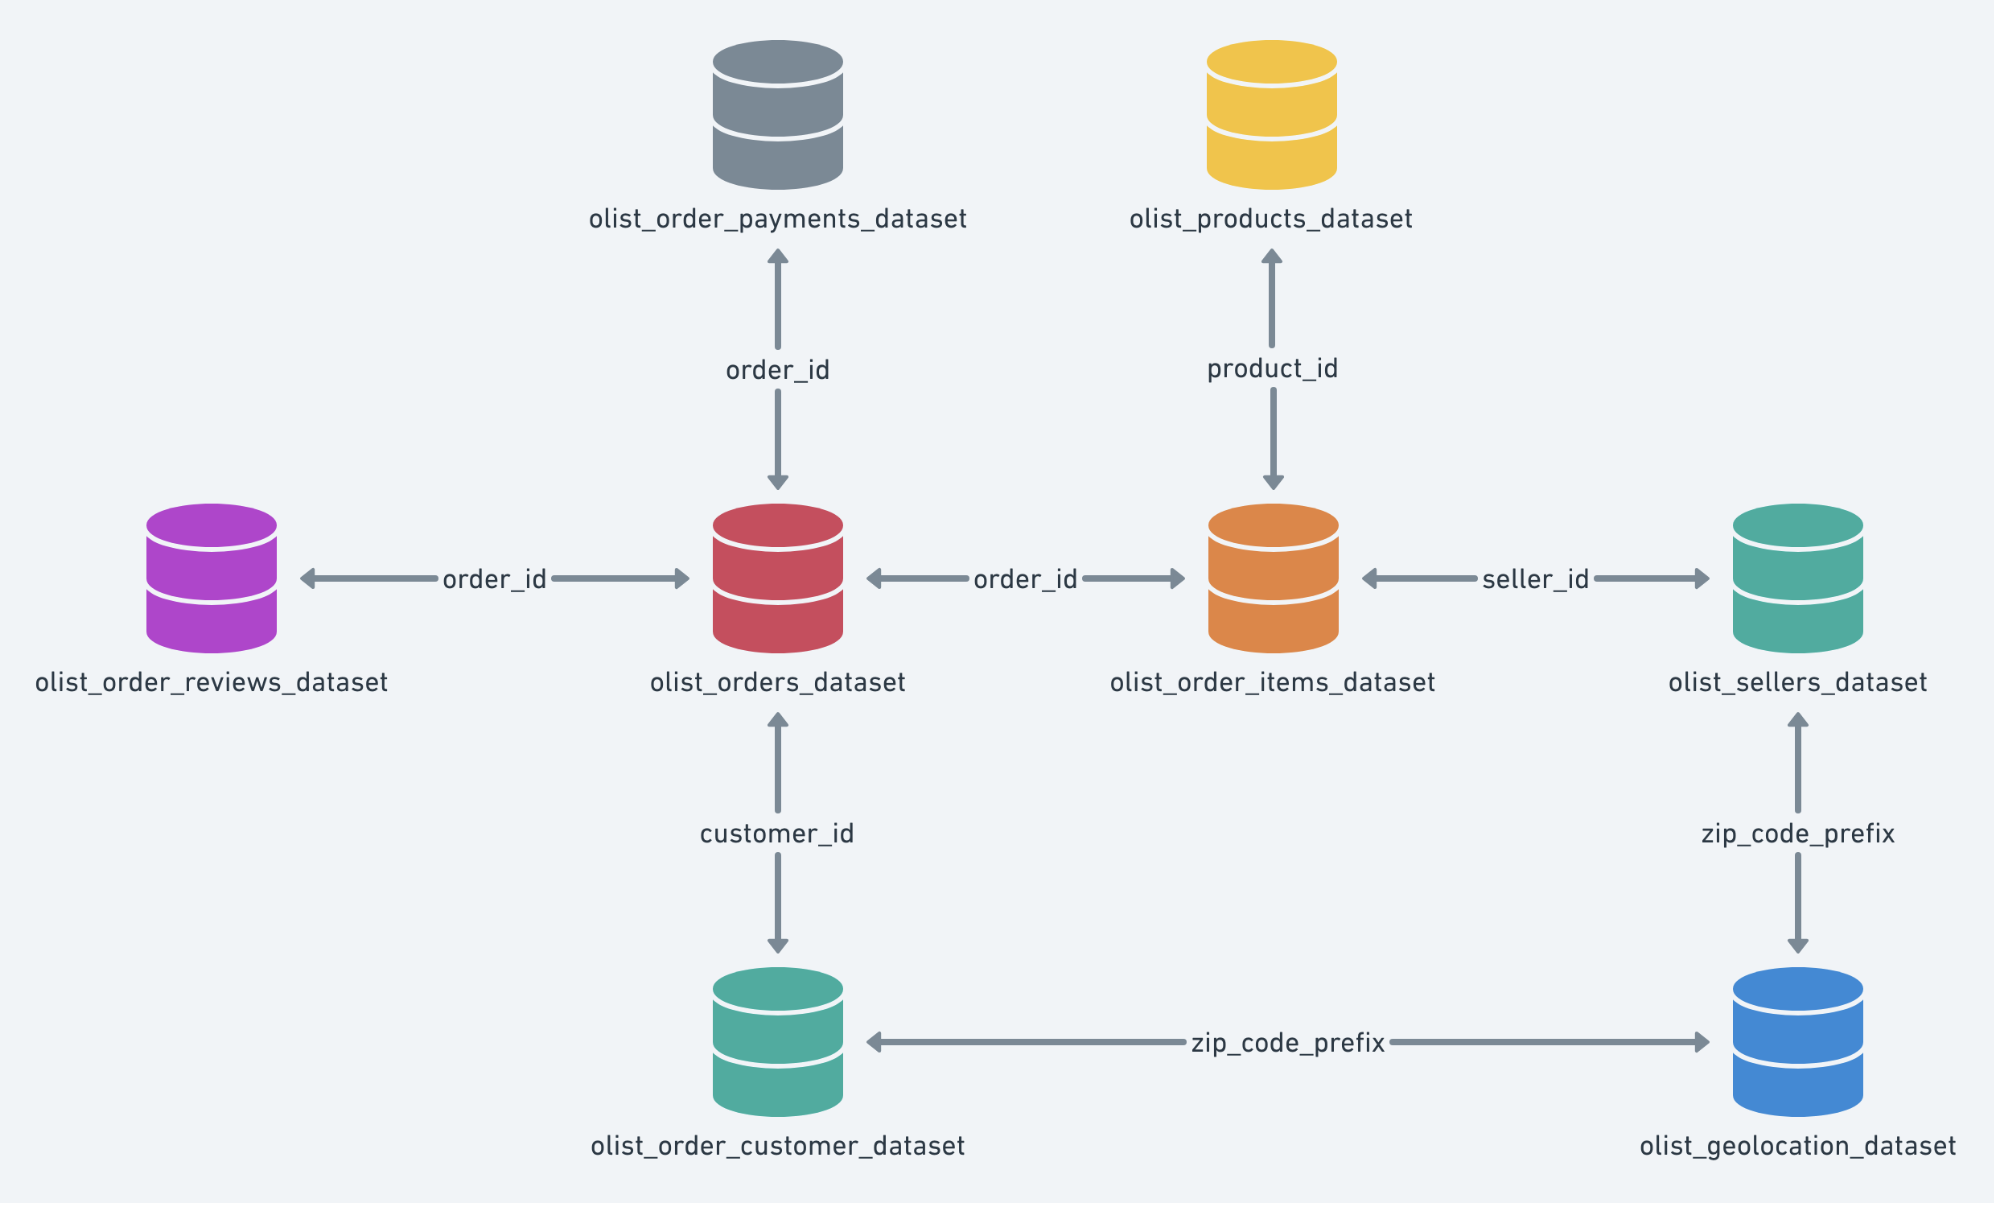

Link to dataset on Kaggle:https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce


***
## Importing Libraries and Datasets <a name="ImportingLibrariesAndDatasets"></a>

The first step is to import the essential libraries that we will use in this notebook.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

Next step is to load the datasets from different comma separated files (csv) using pandas `read.csv`

In [2]:
# loading our csv files 
customer_df = pd.read_csv('olist_customers_dataset.csv')
location_df = pd.read_csv('olist_geolocation_dataset.csv')
order_items_df = pd.read_csv('olist_order_items_dataset.csv')
payments_df = pd.read_csv('olist_order_payments_dataset.csv')
review_df = pd.read_csv('olist_order_reviews_dataset.csv')
orders_df = pd.read_csv ('olist_orders_dataset.csv')
products_df = pd.read_csv('olist_products_dataset.csv')
sellers_df = pd.read_csv('olist_sellers_dataset.csv')
prodct_name_eng_df = pd.read_csv ('product_category_name_translation.csv')

***
## Explore and Merge Data Frames

### 1. Customer data

We will explore all the dataframe individually and merge dataframe where neccesary. Let us start with customer dataframe `df_customer`. 

In [3]:
# see the first few rows 
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


In [4]:
# check the customer data types 
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [5]:
# check the data shape
customer_df.shape

(99441, 5)

We have 99,441 rows and 5 columns. There are two columns with customer Identities, `customer_id` and `customer_unique_id`. The `customer_unique_id` is unique to each customer while `customer_id` is generated for every order. It is important to check if the statement is true because in order to understand and predict churn, `customer_id` for individual order must not be duplicated.  

In [6]:
# check for duplicated values in 'customer_id' and 'customer_unique_id'
print(f" Customer ID for each order : {customer_df['customer_id'].duplicated().value_counts()}")
print(f"Customer unique identifier for each customer :{customer_df['customer_unique_id'].duplicated().value_counts()}")

 Customer ID for each order : False    99441
Name: customer_id, dtype: int64
Customer unique identifier for each customer :False    96096
True      3345
Name: customer_unique_id, dtype: int64


There is no duplication of data in our customer unique identifier and customer ID for each order. `customer_id` has 99,441 rows, same lenght as our dataframe, that means we have customer order IDs generated for all order. `customer_unique_id` contains 96,096 rows, less than our dataframe lenght, this implies we have returning customers.

In [7]:
# check the dataframe for null values
customer_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### 2. Location data

In [8]:
# see the first few rows 
location_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


The location data contains zip code, cities, states, longitude and latitude of the cities.

In [9]:
# check the shape 
location_df.shape

(1000163, 5)

In [10]:
# check data types and info
location_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [11]:
# check the dataframe for null values
location_df.isnull().sum()

geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64

### 3. Order Item data

In [12]:
# see the first few rows
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,19/09/2017 09:45,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,03/05/2017 11:05,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,18/01/2018 14:48,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,15/08/2018 10:10,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,13/02/2017 13:57,199.90,18.14


The dataframe here contains IDs of seller, product, order item which is unique to each item, order id, the product price, shipping date and freight value.

In [13]:
# check data types and info
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [14]:
# check the shape 
order_items_df.shape

(112650, 7)

In the order_items dataframe, we have 112,650 order rows and 7 columns for all items ordered. 

In [15]:
# check for duplicated values in 'customer_id' and 'customer_unique_id'
print(f" ID per order : {order_items_df['order_id'].duplicated().value_counts()}")
print(f"Customer unique identifier for each customer :{order_items_df['order_item_id'].duplicated().value_counts()}")

 ID per order : False    98666
True     13984
Name: order_id, dtype: int64
Customer unique identifier for each customer :True     112629
False        21
Name: order_item_id, dtype: int64


### 4. Payment data

In [16]:
# see the first few rows
payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


The payment data has information about payment installment, payment value, how payment was made and the sequence.

In [17]:
# check null values 
payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64

In [18]:
# see the types of payment methods
payments_df['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [19]:
# check the shape of the data
payments_df.shape

(103886, 5)

### 5. Review data

In [20]:
# see the first few rows
review_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,18/01/2018 00:00,18/01/2018 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,10/03/2018 00:00,11/03/2018 03:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,17/02/2018 00:00,18/02/2018 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,21/04/2017 00:00,21/04/2017 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,01/03/2018 00:00,02/03/2018 10:26


Review dataframe has the review score, review message with title, the time review was created and answered. 

In [21]:
# check the dataframe shape
review_df.shape

(99224, 7)

In [22]:
# check the null values in review data
review_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

The `review_comment_title` and `review_comment_message` has a lot of null values present. Let us check the pertange of the null values, so we will have an insight to how to deal with null values.

In [23]:
# check the percentage of null values in review dataframe
review_df.isnull().sum()/review_df.shape[0]*100

review_id                   0.000000
order_id                    0.000000
review_score                0.000000
review_comment_title       88.341530
review_comment_message     58.702532
review_creation_date        0.000000
review_answer_timestamp     0.000000
dtype: float64

For the columns with null values, `review_comment_message` has 58.7 % null values and `review_comment_title` with 88.34%. Because they both have more than 50% of null values, we will drop the two columns.

In [24]:
# drop `review_comment_title` and `review_comment_message` 
review_df.dropna(axis = 'columns', inplace = True)

In [25]:
# recheck if the columns were dropped
review_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [26]:
# check the dataframe shape
review_df.shape

(99224, 5)

We have successfully dropped two columns, the column shape reduced from 7 to 5.

### 6. Order data

In [27]:
# check the first few rows
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


Order dataframe contains all information about orders: approved date and time, the status, when the order was purchased, estimated delicery date, date order was delivered, carrier delivered date.

In [28]:
# see the shape 
orders_df.shape

(99441, 8)

In [29]:
# check for null values
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

There are null values present in order_approved_at, order_delivered_carrier_date and order_delivered_customer_date. Let us check the percentages of missing values in the order dataframe.

In [30]:
# check the percentage of null values in order dataframe
orders_df.isnull().sum()/orders_df.shape[0]*100

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

From the percentages, `order_approved_at` has **0.16%** missing values, `order_delivered_carrier_date` has **1.79%** and `order_delivered_customer_date` with **2.98%**. These are negligible percentages therefore if we will drop all null values.

In [31]:
# drop null values 
orders_df.dropna(axis = 0, inplace = True)

In [32]:
# recheck for null values
orders_df.isnull().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
dtype: int64

We now have zero `NaNs` values in the order dataframe.

### 7. Products data

In [33]:
# check the product data
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


The product dataframe contains information about product - the weight, lenght, height, width, product name lenght,the product categoryand photos quantity. 

In [34]:
# see the shape of the data
products_df.shape

(32951, 9)

In [35]:
# check the null values in the data
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

We have some null values in all the columns except `product_id`. Let us check the percentage, it will give us an insight to how to deal with the nulls.

In [36]:
# check the percentage of null values in order dataframe
products_df.isnull().sum()/products_df.shape[0]*100

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

The percentages are negligible. Let us check the null values columns.

In [37]:
products_df[products_df[['product_category_name', 'product_name_lenght', 
                         'product_description_lenght', 'product_photos_qty']].isnull().any(axis=1)]

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
105,a41e356c76fab66334f36de622ecbd3a,NaN,NaN,NaN,NaN,650.0,17.0,14.0,12.0
128,d8dee61c2034d6d075997acef1870e9b,NaN,NaN,NaN,NaN,300.0,16.0,7.0,20.0
145,56139431d72cd51f19eb9f7dae4d1617,NaN,NaN,NaN,NaN,200.0,20.0,20.0,20.0
154,46b48281eb6d663ced748f324108c733,NaN,NaN,NaN,NaN,18500.0,41.0,30.0,41.0
197,5fb61f482620cb672f5e586bb132eae9,NaN,NaN,NaN,NaN,300.0,35.0,7.0,12.0
...,...,...,...,...,...,...,...,...,...
32515,b0a0c5dd78e644373b199380612c350a,NaN,NaN,NaN,NaN,1800.0,30.0,20.0,70.0
32589,10dbe0fbaa2c505123c17fdc34a63c56,NaN,NaN,NaN,NaN,800.0,30.0,10.0,23.0
32616,bd2ada37b58ae94cc838b9c0569fecd8,NaN,NaN,NaN,NaN,200.0,21.0,8.0,16.0
32772,fa51e914046aab32764c41356b9d4ea4,NaN,NaN,NaN,NaN,1300.0,45.0,16.0,45.0


The values are similar across the product_category_name, product_name_lenght, product_description_lenght, product_photos_qty. We will drop the nulls values.

In [38]:
# drop the missing values
products_df.dropna(inplace = True)

In [39]:
# sanity check
products_df.isnull().sum()

product_id                    0
product_category_name         0
product_name_lenght           0
product_description_lenght    0
product_photos_qty            0
product_weight_g              0
product_length_cm             0
product_height_cm             0
product_width_cm              0
dtype: int64

There is no null values anymore in the product data

### 8. Sellers data

In [40]:
# check the sellers data
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


Sellers data has information on sellers location: the cities, states and zip codes.

In [41]:
# see the shape of the data
sellers_df.shape

(3095, 4)

In [42]:
# check null values
sellers_df.isnull().sum()

seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

### 9. Product name data

In [43]:
# check the data
prodct_name_eng_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


This is a two column dataframe with product category name in portuguese and english.

In [44]:
# check the shape
prodct_name_eng_df.shape

(71, 2)

In [45]:
# check for null values
prodct_name_eng_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

### Merge Data Frame

Next, we will join all the differrent dataframes together by first joining location to customer dataframe in order to add the customer coordinates (latitude and longitude).

In [46]:
# join location and customer dataframe
customer_location_df = pd.merge(customer_df, location_df , left_on='customer_zip_code_prefix',
                               right_on='geolocation_zip_code_prefix' )

In [47]:
# check the new customer location
customer_location_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,14409,-20.515413,-47.398194,franca,SP


In [48]:
# check the sahpe of customer location
customer_location_df.shape

(15083455, 10)

Next, we will drop `geolocation_zip_code_prefix` and rename `geolocation_lat` and `geolocation_lng` to reflect customers location.

In [49]:
# drop 'geolocation_zip_code_prefix' column
customer_location_df.drop('geolocation_zip_code_prefix', axis=1, inplace=True)

In [50]:
# check the customer location
customer_location_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP


In [51]:
# rename 'geolocation_lng' and 'geolocation_lat'
customer_location_df = customer_location_df.rename(columns = {'geolocation_lat' : 'customer_latitude', 
                                                              'geolocation_lng': 'customer_longitude'})

In [52]:
# recheck the dataframe
customer_location_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude,geolocation_city,geolocation_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,franca,SP
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241,franca,SP
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553,franca,SP
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161,franca,SP
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194,franca,SP


In [53]:
# drop 'geolocation_city' and 'geolocation_state' to avoid repetition
customer_location_df.drop(['geolocation_city', 'geolocation_state'], axis=1, inplace=True)

In [54]:
# recheck the dataframe
customer_location_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866
1,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.497396,-47.399241
2,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.510459,-47.399553
3,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.480940,-47.394161
4,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.515413,-47.398194


In [55]:
# check the shape of the dataframe
customer_location_df.shape

(15083455, 7)

The new customer location dataframe has 15,083,455 rows and 7 columns. That means we have some duplication when joining the dataframes.

In [56]:
# check for duplicates
customer_location_df['customer_id'].duplicated().sum()

14984292

In [57]:
# remove all the duplicates
customer_location_df = customer_location_df.drop_duplicates(subset=["customer_id"], keep = 'first')

In [58]:
# recheck for duplicates
customer_location_df['customer_id'].duplicated().sum()

0

In [59]:
# recheck the shape
customer_location_df.shape

(99163, 7)

Let us do same for Sellers location

In [60]:
# merge location and sellers dataframe 
sellers_location_df = pd.merge(sellers_df, location_df , left_on='seller_zip_code_prefix', 
                          right_on='geolocation_zip_code_prefix')

In [61]:
# check the new sellers location dataframe
sellers_location_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.898536,-47.063125,campinas,SP
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895499,-47.061944,campinas,SP
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.891740,-47.060820,campinas,SP
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.895762,-47.066144,campinas,SP
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,13023,-22.896154,-47.062431,campinas,SP


In [62]:
# check the dataframe shape
sellers_location_df.shape

(435087, 9)

In [63]:
# drop `geolocation_zip_code_prefix` , 
sellers_location_df.drop(['geolocation_zip_code_prefix', 'geolocation_city', 'geolocation_state'], 
                         axis=1, inplace=True)

In [64]:
# check the dataframe
sellers_location_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,geolocation_lat,geolocation_lng
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891740,-47.060820
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.896154,-47.062431


In [65]:
# rename `geolocation_lat` and `geolocation_lng` to reflect customers location
sellers_location_df = sellers_location_df.rename(columns = {'geolocation_lat' : 'seller_latitude', 
                                                            'geolocation_lng': 'seller_longitude'})

In [66]:
# check the dataframe
sellers_location_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_latitude,seller_longitude
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125
1,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895499,-47.061944
2,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.891740,-47.060820
3,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.895762,-47.066144
4,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.896154,-47.062431


In [67]:
# remove duplicates rows
sellers_location_df= sellers_location_df.drop_duplicates(subset=["seller_id"], keep = 'first')

In [68]:
# recheck the dataframe
sellers_location_df.shape

(3088, 6)

In [69]:
sellers_location_df['seller_id'].duplicated().sum()

0

In [70]:
# recheck the dataframe
sellers_location_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state,seller_latitude,seller_longitude
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP,-22.898536,-47.063125
80,e0eabded302882513ced4ea3eb0c7059,13023,campinas,SP,-22.898536,-47.063125
160,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP,-22.382941,-46.946641
263,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ,-22.910641,-43.176510
650,1d2732ef8321502ee8488e8bed1ab8cd,20031,rio de janeiro,RJ,-22.910641,-43.176510


We will merge all the dataframes into one dataframe.

In [71]:
# join all the dataframe 
df = customer_location_df.merge(orders_df, on = 'customer_id', how = 'left')\
    .merge(payments_df, on = 'order_id', how = 'left') \
    .merge(order_items_df, on = 'order_id', how = 'left')\
    .merge(review_df, on = 'order_id', how = 'left')\
    .merge(products_df, on = 'product_id', how = 'left')\
    .merge(prodct_name_eng_df, on = 'product_category_name', how = 'left')\
    .merge(sellers_location_df, on = 'seller_id', how = 'left')

In [72]:
# check the new dataframe
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude,order_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,seller_latitude,seller_longitude
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,8683.0,54.0,64.0,31.0,office_furniture,8577.0,itaquaquecetuba,SP,-23.482623,-46.374490
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.509897,-47.397866,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,...,1383.0,50.0,10.0,40.0,bed_bath_table,14940.0,ibitinga,SP,-21.766477,-48.831547
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.509897,-47.397866,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,...,1200.0,47.0,7.0,26.0,toys,89204.0,joinville,SC,-26.283149,-48.851285
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.509897,-47.397866,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,...,567.0,19.0,14.0,15.0,auto,4243.0,sao paulo,SP,-23.626269,-46.586534
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.509897,-47.397866,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,...,300.0,20.0,7.0,15.0,telephony,1212.0,sao paulo,SP,-23.537511,-46.637057


In [73]:
# check the shape
df.shape

(118369, 42)

In [74]:
# see the dataframe datatypes and information
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118369 entries, 0 to 118368
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    118369 non-null  object 
 1   customer_unique_id             118369 non-null  object 
 2   customer_zip_code_prefix       118369 non-null  int64  
 3   customer_city                  118369 non-null  object 
 4   customer_state                 118369 non-null  object 
 5   customer_latitude              118369 non-null  float64
 6   customer_longitude             118369 non-null  float64
 7   order_id                       115403 non-null  object 
 8   order_status                   115403 non-null  object 
 9   order_purchase_timestamp       115403 non-null  object 
 10  order_approved_at              115403 non-null  object 
 11  order_delivered_carrier_date   115403 non-null  object 
 12  order_delivered_customer_date 

Let us check for null values in our combined dataframe.

In [75]:
# check for null values
df.isnull().sum()

customer_id                         0
customer_unique_id                  0
customer_zip_code_prefix            0
customer_city                       0
customer_state                      0
customer_latitude                   0
customer_longitude                  0
order_id                         2966
order_status                     2966
order_purchase_timestamp         2966
order_approved_at                2966
order_delivered_carrier_date     2966
order_delivered_customer_date    2966
order_estimated_delivery_date    2966
payment_sequential               2969
payment_type                     2969
payment_installments             2969
payment_value                    2969
order_item_id                    2966
product_id                       2966
seller_id                        2966
shipping_limit_date              2966
price                            2966
freight_value                    2966
review_id                        3826
review_score                     3826
review_creat

In [76]:
# check the null values percentage 
df.isnull().sum()/df.shape[0]*100

customer_id                      0.000000
customer_unique_id               0.000000
customer_zip_code_prefix         0.000000
customer_city                    0.000000
customer_state                   0.000000
customer_latitude                0.000000
customer_longitude               0.000000
order_id                         2.505724
order_status                     2.505724
order_purchase_timestamp         2.505724
order_approved_at                2.505724
order_delivered_carrier_date     2.505724
order_delivered_customer_date    2.505724
order_estimated_delivery_date    2.505724
payment_sequential               2.508258
payment_type                     2.508258
payment_installments             2.508258
payment_value                    2.508258
order_item_id                    2.505724
product_id                       2.505724
seller_id                        2.505724
shipping_limit_date              2.505724
price                            2.505724
freight_value                    2

There are null values present in our dataframe, ranging from 0.26% to 2.84%, dropping these null values will not have material inpact on our data and interpretation. Therefore we will drop all null values in our data.

In [77]:
# drop 'review_comment_message' and 'review_comment_title'
df.dropna(inplace = True)

In [78]:
# recheck the dataframe shape
df.shape

(112637, 42)

In [79]:
# recheck the null values 
df.isnull().sum()

customer_id                      0
customer_unique_id               0
customer_zip_code_prefix         0
customer_city                    0
customer_state                   0
customer_latitude                0
customer_longitude               0
order_id                         0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_creation_date             0
review_answer_timestamp          0
product_category_nam

We now have a dataframe with zero null value.

In [80]:
# rename product_name_lenght and product_description_lenght
df.rename(columns = {'product_description_lenght': 'product_description_length', 
          'product_name_lenght': 'product_name_length'}, inplace = True)

In [81]:
#check the datatypes of our new non-null value dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112637 entries, 0 to 118368
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   customer_id                    112637 non-null  object 
 1   customer_unique_id             112637 non-null  object 
 2   customer_zip_code_prefix       112637 non-null  int64  
 3   customer_city                  112637 non-null  object 
 4   customer_state                 112637 non-null  object 
 5   customer_latitude              112637 non-null  float64
 6   customer_longitude             112637 non-null  float64
 7   order_id                       112637 non-null  object 
 8   order_status                   112637 non-null  object 
 9   order_purchase_timestamp       112637 non-null  object 
 10  order_approved_at              112637 non-null  object 
 11  order_delivered_carrier_date   112637 non-null  object 
 12  order_delivered_customer_date 

All our date and time column are object, let us convert to datetime data type.

In [82]:
# import datetime
from datetime import datetime

# assign all columns with date and time to a dataframe
date_time_columns =['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date',
                           'order_estimated_delivery_date','shipping_limit_date', 'review_creation_date', 'review_answer_timestamp']

In [83]:
# convert all date columns to datetime data type
df[date_time_columns] = df[date_time_columns].apply(pd.to_datetime)

In [84]:
# recheck the datatype
df.dtypes

customer_id                              object
customer_unique_id                       object
customer_zip_code_prefix                  int64
customer_city                            object
customer_state                           object
customer_latitude                       float64
customer_longitude                      float64
order_id                                 object
order_status                             object
order_purchase_timestamp         datetime64[ns]
order_approved_at                datetime64[ns]
order_delivered_carrier_date     datetime64[ns]
order_delivered_customer_date    datetime64[ns]
order_estimated_delivery_date    datetime64[ns]
payment_sequential                      float64
payment_type                             object
payment_installments                    float64
payment_value                           float64
order_item_id                           float64
product_id                               object
seller_id                               

Some columns were misspelt, we will rename them properly.

In [85]:
# rename product_name_lenght and product_description_lenght
df.rename(columns = {'product_description_lenght': 'product_description_length', 
          'product_name_lenght': 'product_name_length'}, inplace = True)

In [86]:
# check the renamed-dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112637 entries, 0 to 118368
Data columns (total 42 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_id                    112637 non-null  object        
 1   customer_unique_id             112637 non-null  object        
 2   customer_zip_code_prefix       112637 non-null  int64         
 3   customer_city                  112637 non-null  object        
 4   customer_state                 112637 non-null  object        
 5   customer_latitude              112637 non-null  float64       
 6   customer_longitude             112637 non-null  float64       
 7   order_id                       112637 non-null  object        
 8   order_status                   112637 non-null  object        
 9   order_purchase_timestamp       112637 non-null  datetime64[ns]
 10  order_approved_at              112637 non-null  datetime64[ns]
 11  

In [87]:
# sanity check
df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,customer_latitude,customer_longitude,order_id,order_status,order_purchase_timestamp,...,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english,seller_zip_code_prefix,seller_city,seller_state,seller_latitude,seller_longitude
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,-20.509897,-47.397866,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,...,8683.0,54.0,64.0,31.0,office_furniture,8577.0,itaquaquecetuba,SP,-23.482623,-46.374490
1,5dca924cc99eea2dc5ba40d11ec5dd0f,2761fee7f378f0a8d7682d8a3fa07ab1,14409,franca,SP,-20.509897,-47.397866,95261f608a64bbbe760a212b4d48a4ee,delivered,2018-06-15 20:07:13,...,1383.0,50.0,10.0,40.0,bed_bath_table,14940.0,ibitinga,SP,-21.766477,-48.831547
2,661897d4968f1b59bfff74c7eb2eb4fc,d06a495406b79cb8203ea21cc0942f8c,14409,franca,SP,-20.509897,-47.397866,9444fa2ab50a3f5af63b48be297eda24,delivered,2017-09-09 15:40:00,...,1200.0,47.0,7.0,26.0,toys,89204.0,joinville,SC,-26.283149,-48.851285
3,702b62324327ccba20f1be3465426437,8b3d988f330c1d1c3332ccd440c147b7,14409,franca,SP,-20.509897,-47.397866,dceb8e88274c6f42a88a76ed979eb817,delivered,2018-03-26 12:04:55,...,567.0,19.0,14.0,15.0,auto,4243.0,sao paulo,SP,-23.626269,-46.586534
4,bdf997bae7ca819b0415f5174d6b4302,866755e25db620f8d7e81b351a15bb2f,14409,franca,SP,-20.509897,-47.397866,6ee1cea1b2edcc713f83ebfbccbc57f9,delivered,2018-07-29 20:39:20,...,300.0,20.0,7.0,15.0,telephony,1212.0,sao paulo,SP,-23.537511,-46.637057


We are satisfied with our new dataframe, we will export as csv.

In [88]:
# export and save as a csv file
df.to_csv('cleaned_df.csv', index = False)

### Conclusion

Here, we have successfully import all the datasets we need for the project, merge them and cleaned the data by removing null values and duplicates were also removed. The cleaned csv will be used in  **Notebook #2 for feature engineering.**